In [61]:
from Beamformer_MVDR import beamformer_MVDR_FarField
import utils
# from acoular import MicGeom
import numpy as np
from scipy.io import wavfile
import os


MIC_ANGLE_VECTOR = np.array([0, 60, 120, 180, 270, 330])
LOOK_DIRECTION = 250
MIC_DIAMETER = 0.1
SAMPLING_RATE = 16000
FFT_LENGTH = 1024
FFT_SHIFT = 512
SOUND_SPEED = 343

def multi_channel_read():
    channel_index_vector=np.array([1, 2, 3, 4, 5, 6])
    multi_signal = []
    for chn in channel_index_vector:
        filepath = f'./data/sample_data/20G_20GO010I_STR.CH{chn}.wav'
        _, signal = wavfile.read(filepath)
        multi_signal.append(signal)
    return np.array(multi_signal).T

In [62]:
multi_signal = multi_channel_read()
complex_spectrum = utils.get_spectrogram(multi_signal, FFT_LENGTH, FFT_SHIFT, FFT_LENGTH)
mvdr_beamformer = beamformer_MVDR_FarField(MIC_ANGLE_VECTOR,
                                           MIC_DIAMETER,
                                           sampling_frequency=SAMPLING_RATE,
                                           fft_length=FFT_LENGTH,
                                           fft_shift=FFT_SHIFT)
steering_vector = mvdr_beamformer.get_steering_vector(LOOK_DIRECTION)
spatial_correlation_matrix = mvdr_beamformer.get_spatial_correlation_matrix(multi_signal)
beamformer = mvdr_beamformer.get_mvdr_beamformer(steering_vector, spatial_correlation_matrix)
enhanced_spectrum = mvdr_beamformer.apply_beamformer(beamformer, complex_spectrum)

Calculating result for 6005.865102639296Hz


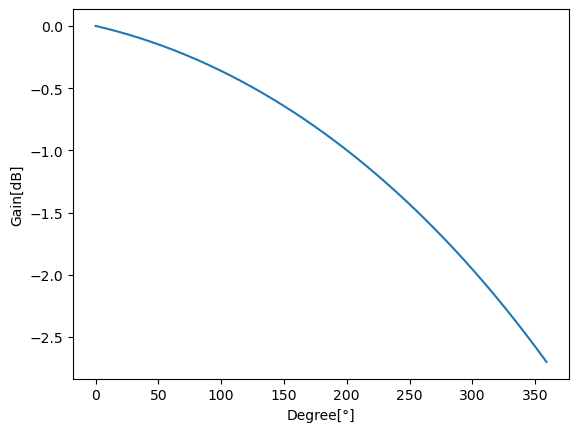

In [63]:
import matplotlib.pyplot as plt

searching_angle_rad = np.deg2rad(np.arange(0, 360, 1).reshape([1, -1])) # every angle for filter curve
SIG_FREQ = 6000
B = mvdr_beamformer.get_filter(searching_angle_rad, beamformer, SIG_FREQ)

x=np.arange(0, 360, 1).reshape([-1])
y = []
for ele in np.arange(B.shape[1]):
    y.append(B[0,ele])

plt.plot(x, 20 * np.log10(y))
plt.xlabel('Degree[°]')
plt.ylabel('Gain[dB]')
plt.show()

In [64]:
# enhanced_audio = enhanced_spectrum
# enhanced_audio = enhanced_audio / np.max(np.abs(enhanced_audio)) * 0.7
# OUTPUT_FILENAME = f'./test_{LOOK_DIRECTION}.wav'
# wavfile.write(OUTPUT_FILENAME, SAMPLING_RATE, enhanced_audio.astype(np.float32))